In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob

from descriptors.acsf.sf_function import SymmetryFunction
plt.style.use({'figure.facecolor':'white'})

In [37]:
def plot_rdf(data, ax):
    # fig = plt.figure(figsize=(8, 6))
    center_atom = data['center_atom'].unique()[0]
    another_atom = data['another_atom'].unique()[0]

    # ax = fig.add_subplot()
    ax.set_title(f"{center_atom}-{another_atom} RDF", fontsize = 14)
    ax.set_xlabel("r(Å)", size = 10, weight = "light")
    ax.set_ylabel(f"g(r) {center_atom}-{another_atom}", size = 10, weight = "light")
    ax.set_xlim([0,15])
    x = list(map(lambda i: round(float(i),2),data.columns[4:]))

    mean = data.mean()[1:]
    std = data.std()[1:]

    ax.fill_between(x, mean + std, mean - std, alpha=0.2, color='red')
    ax.plot(x, mean, color='red')

In [38]:
# SFプロット
def plot_two_body_interaction(df, ax, bond):
        converge_ene = df[df.distance == 11.00000].energy.values[0]
        df['energy_diff'] = df.energy - converge_ene
        ax.set_xlabel('r (ang)')
        ax.set_ylabel('energy (eV)')
        ax.set_xlim([0,15])
        ax.set_title(f'interatomic potential {bond}')
        ax.plot(df.distance, df.energy_diff)

<ipython-input-37-0daa3050624e>:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = data.mean()[1:]
<ipython-input-37-0daa3050624e>:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std = data.std()[1:]
<ipython-input-37-0daa3050624e>:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = data.mean()[1:]
<ipython-input-37-0daa3050624e>:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will r

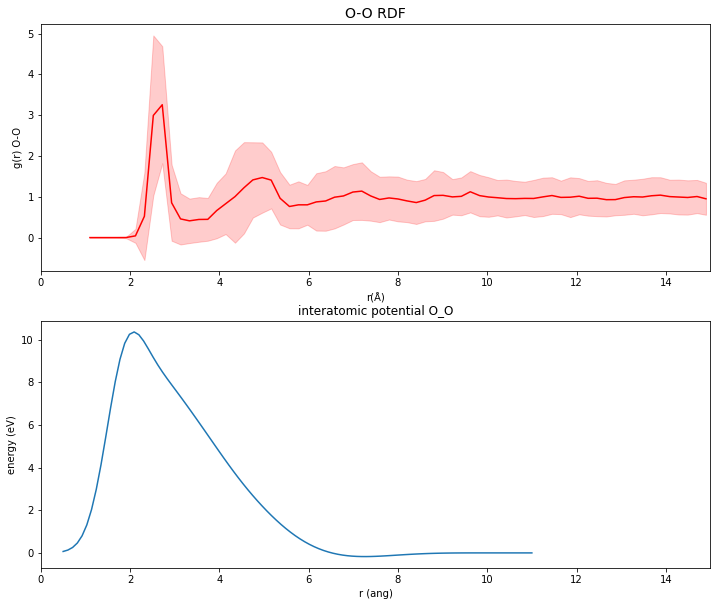

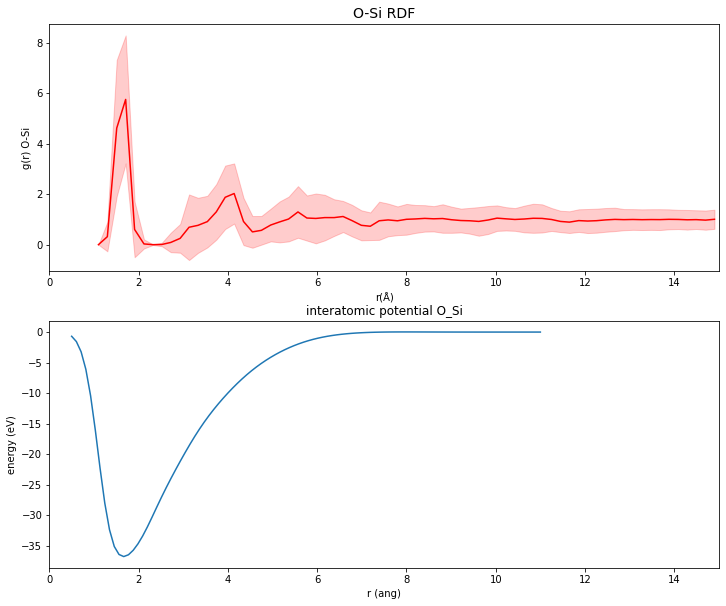

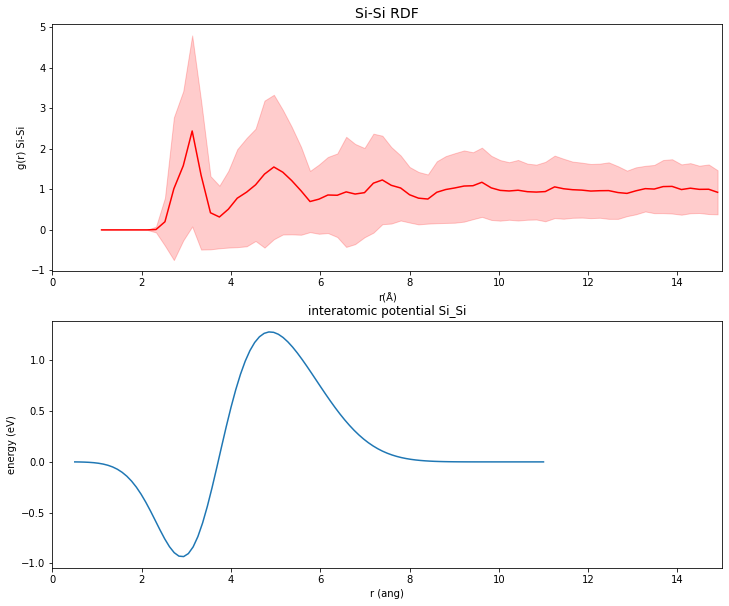

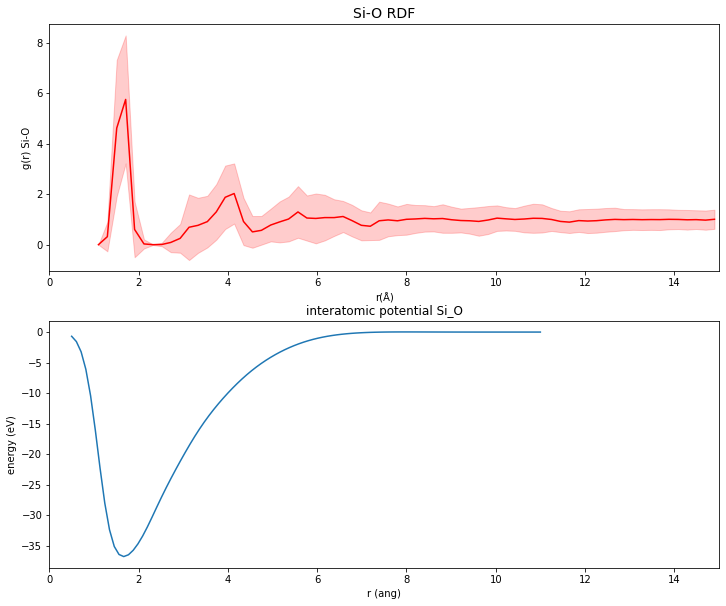

In [39]:
def rdf_two_body_together(bond):
    rdf_path = '/Users/y1u0d2/Desktop/Lab/result/rdf/rdf_structure_all_converge_one/'
    df_rdf = pd.read_csv(f'{rdf_path}/all_{bond}.csv')
    fig, axes= plt.subplots(2,1,figsize=(12,10))
    plot_rdf(df_rdf, ax=axes[0])

    root_dir = '/Users/y1u0d2/desktop/Lab/result/two-body-interatomic/05/'
    df_inter = pd.read_csv(f'{root_dir}/two-body_{bond}.csv')
    plot_two_body_interaction(df=df_inter, ax=axes[1], bond=bond)
    fig.savefig(f'{root_dir}/two-body_{bond}')

bond = ['O_O','O_Si','Si_Si','Si_O']
for i in bond:
    rdf_two_body_together(i)